# Decision Trees

## Topics:
* Decision Trees
    * Train
    * Visualize
    * Predict
* CART
* Regularize Trees
* Regression
* Limitations

**1. Decision Trees**

train, visualize and predict with tree algorithms

In [2]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier

iris = load_iris()
X = iris.data[:,2:]
y = iris["target"]

tree_clf = DecisionTreeClassifier(max_depth=2)
tree_clf.fit(X,y)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=2, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [9]:
from sklearn.tree import export_graphviz
filename = open("iris_tree.dot", 'w')
tree = export_graphviz(
    tree_clf,
    out_file=filename,
    feature_names=iris.feature_names[2:],
    class_names=iris.target_names,
    rounded=True,
    filled=True
)

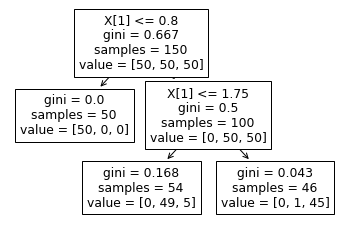

In [17]:
from sklearn.tree import plot_tree

plot_tree(tree_clf);

The node's *gini* attribute measures its *impurity*. 

"pure"=0 if all training isntances it applies to belong to the same class

$G_{i} = 1-\sum_{1}^{n}P_{i,k}^{2}$

In [18]:
tree_clf.predict_proba([[5,1.5]])

array([[0.        , 0.90740741, 0.09259259]])

In [19]:
tree_clf.predict([[5,1.5]])

array([1])

**2. The CART training algorithm**

Works by first splitting the training set into two subsets using feature *k* and the threshold *$t_{k}$*

How dos it choose *k* and *$t_{k}$*?

It searches for the pair (*k*,*$t_{k}$*) that produces the purest subsets (weighted by their size)

$J(k,t_{k}) = \frac{m_{left}}{m}G_{left} + \frac{m_{right}}{m}G_{right}$

where:
$G_{left/right}$ is the measure of the impurity of the left/right side and
$m_{left(right}$ is the number of instances in the left/right subset

Once the CART algorithm has successfully split the training set into two, it splits the subsets using the same logic, then the sub-subsets and so on, recursively. It stops once it reach a *maximum depth* (*max_depth*) or if it cannot find a split that reduce impurity.

**Gini or Entropy?**

Entropy is like a measure of desorder. A set's entropy is zero when it contains instances of only one class. 

$H_{i} = - \sum_{k=1}^{n}P_{i,k}log_{2}(P_{i,k})$

The truth is, most of the time it does not make a big difference; *Gini impurity* and *Entropy* lead to similar trees. (gini is slightly faster, so... good default)

When they differ, *gini* tends to isolate the most frequent class in its own branch of the tree, while *entropy* tends to produce slightly more balanced trees.

**3. Regularization Hyperparameters**

Decision Trees --> *nonparametric model*: the number of parameters is not determined prior training... which may result in overfitting

To avoid overfitting the training data, we need to restrict the Decision Tree's freedom during training. **but how?**

 * Restrict the maximum depth (*max_depth*)
 * Restrict the minimum number of samples a node must have before it can split (*min_samples_split*)
 * Restrict the minimum number of a leaf node must have (*min_samples_leaf*)
 * Restrict the minimum weighted intances a leaf must have (same as *min_samples_leaf* but in proportion)(*min_weight_fraction_leaf*)
 * Restrict the maximum number of leaf nodes (*max_leaf_nodes*)
 * Restrict the maximum number of features that are evaluated for splitting each node (*max_features*)
 * **PRUNING** (how do you imagine this one?)

**4. Regression**

In [140]:
import numpy as np
import matplotlib.pyplot as plt

X = 12 * np.random.rand(400,1)
y = 2 + ((X - 6)**2) + 10*np.random.randn(400,1)

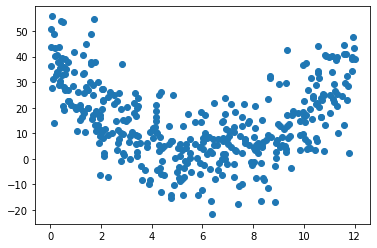

In [141]:
plt.scatter(X, y)
plt.show()

In [142]:
from sklearn.tree import DecisionTreeRegressor

tree_reg = DecisionTreeRegressor(max_depth=2)
tree_reg.fit(X,y)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=2,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

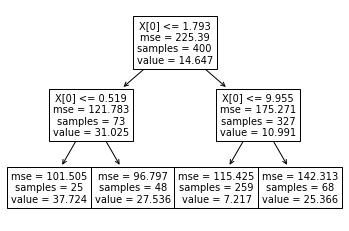

In [143]:
plot_tree(tree_reg);

In [144]:
y_tree = tree_reg.predict(X)

In [145]:
tree_reg3 = DecisionTreeRegressor(max_depth=3)
tree_reg3.fit(X,y)
y_tree3 = tree_reg3.predict(X)

Text(0.5, 1.0, 'max_depth=3')

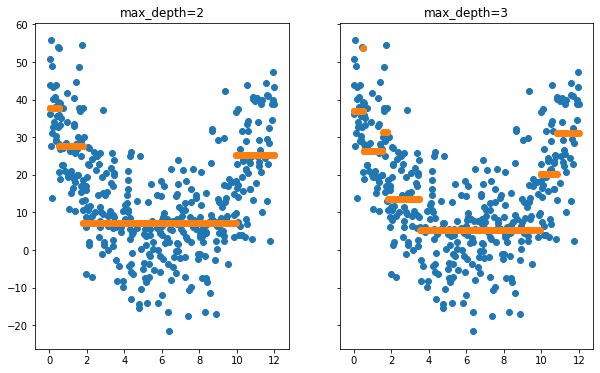

In [146]:
f, (ax1, ax2) = plt.subplots(1, 2, sharey=True, figsize=(10,6))
ax1.scatter(X, y)
ax1.scatter(X, y_tree)
ax1.set_title('max_depth=2')
ax2.scatter(X, y)
ax2.scatter(X, y_tree3)
ax2.set_title('max_depth=3')


**5. Instability**

Decision Trees love orthogonal decision boundaries. Which makes them sensitive to training set rotation.